### Library

In [2]:
# ====================================================
# 📦 Standard Imports
# ====================================================
import warnings
warnings.filterwarnings('ignore')

# ----------------------------------------------------
# 🧩 Core Data Libraries
# ----------------------------------------------------
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 📊 Visualization Libraries
# ----------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import Rectangle
import matplotlib.ticker as mtick

# ----------------------------------------------------
# 📈 Statistics & Tests
# ----------------------------------------------------
from scipy import stats
from scipy.stats import (
    shapiro, normaltest, jarque_bera, skew, kurtosis
)

# ----------------------------------------------------
# 🧠 Machine Learning
# ----------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    f1_score
)

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


### Source

In [3]:
csv_path = "bank-additional-full.csv"
df = pd.read_csv(csv_path, sep=';')

### Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Duplicate Row Analysis

In [8]:
duplicated_rows = df.duplicated()
count_duplicated_rows = duplicated_rows.sum()
df[duplicated_rows]
print(f"Number of Duplicated Rows is: {count_duplicated_rows}")
df[duplicated_rows]

Number of Duplicated Rows is: 12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [25]:
#remove duolicated row
df = df.drop_duplicates(keep='first')
#reset index
df = df.reset_index(drop=True)

### Unique Values

In [22]:
for col in df.columns:
    print(f"Column Name: {col}")
    print(f"Type: {df[col].dtype}")
    print("Unique values:")
    print(df[col].unique())
    print("-" * 40)

Column Name: age
Type: int64
Unique values:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
----------------------------------------
Column Name: job
Type: object
Unique values:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------------------
Column Name: marital
Type: object
Unique values:
['married' 'single' 'divorced' 'unknown']
----------------------------------------
Column Name: education
Type: object
Unique values:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------------------
Column Name: default
Type: object
Unique values:
['no' 'unknown' 'yes']
-----------------------------

### percent of 'unknown' values

In [23]:
# percent of 'unknown' values per column (only columns with >0), rounded
unknown_percent = ((df == 'unknown').sum() / len(df) * 100).round(2)
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)

print("Percent of 'unknown' per column:")
print(unknown_percent)

Percent of 'unknown' per column:
default      20.87
education     4.20
housing       2.40
loan          2.40
job           0.80
marital       0.19
dtype: float64


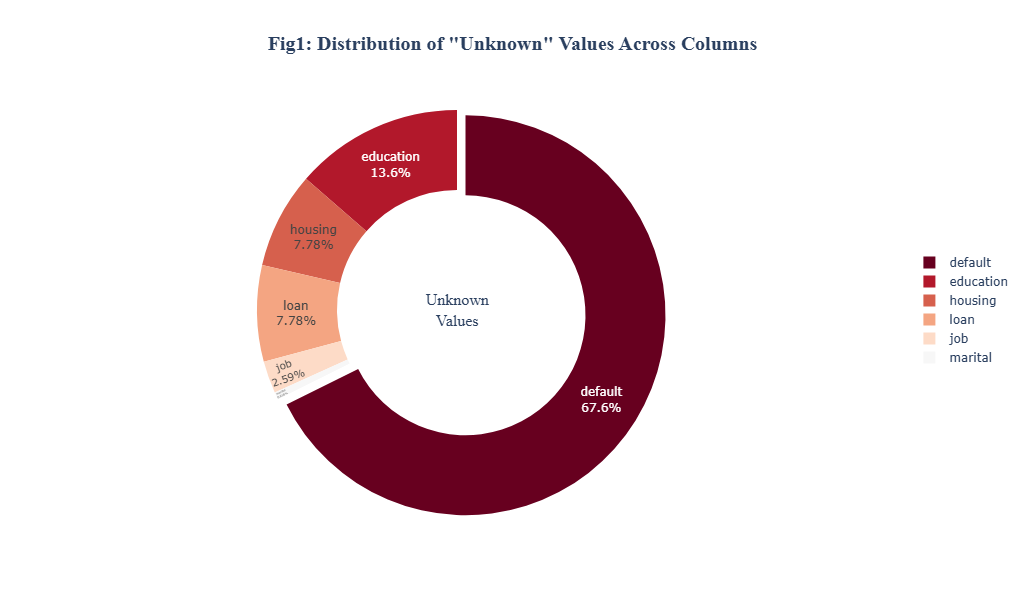

In [24]:
# Calculate percentage of 'unknown' values
unknown_percent = ((df == 'unknown').sum() / len(df) * 100).round(2)
unknown_percent = unknown_percent[unknown_percent > 0].sort_values(ascending=False)

# Create donut chart
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=unknown_percent.index,
    values=unknown_percent.values,
    hole=0.6,
    marker=dict(colors=px.colors.sequential.RdBu),
    textinfo='label+percent',
    textposition='inside',
    hovertemplate='<b>%{label}</b><br>Unknown: %{value}%<br>Total: %{text}',
    pull=[0.05 if i == 0 else 0 for i in range(len(unknown_percent))]
))

fig.update_layout(
    title={
        'text': '<b>Fig1: Distribution of "Unknown" Values Across Columns</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Times New Roman'}
    },
    annotations=[{
        'text': 'Unknown<br>Values',
        'x': 0.5, 'y': 0.5,
        'font_size': 16,
        'showarrow': False,
        'font': {'family': 'Times New Roman'}
    }],
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.1
    ),
    height=600,
    width=800
)

fig.show()

# Bank Marketing Dataset: Column Descriptions

### Client Attributes

1.  **`age`** (numeric)
    - Client's age in years.

2.  **`job`** (categorical)
    - Type of job: `"housemaid"`, `"services"`, `"admin."`, `"blue-collar"`, `"technician"`, `"retired"`, `"management"`, `"unemployed"`, `"self-employed"`, `"unknown"`, `"entrepreneur"`, `"student"`.

3.  **`marital`** (categorical)
    - Marital status: `"married"`, `"single"`, `"divorced"`, `"unknown"`.
    - **Note:** 'divorced' includes both divorced and widowed individuals.

4.  **`education`** (categorical)
    - Client's education level: `"basic.4y"`, `"high.school"`, `"basic.6y"`, `"basic.9y"`, `"professional.course"`, `"unknown"`, `"university.degree"`, `"illiterate"`.

5.  **`default`** (binary)
    - Has credit in default? `"yes"`, `"no"`, `"unknown"`.

6.  **`housing`** (binary)
    - Has a housing loan? `"yes"`, `"no"`, `"unknown"`.

7.  **`loan`** (binary)
    - Has a personal loan? `"yes"`, `"no"`, `"unknown"`.

### Last Contact Features

8.  **`contact`** (categorical)
    - Contact communication type: `"telephone"`, `"cellular"`.

9.  **`month`** (categorical)
    - Last contact month of the year: `"jan"`, `"feb"`, `"mar"`, ..., `"dec"`.

10. **`day_of_week`** (categorical)
    - Last contact day of the week: `"mon"`, `"tue"`, `"wed"`, `"thu"`, `"fri"`.

11. **`duration`** (numeric)
    - Duration of the last contact in seconds.
    - **Crucial Note:** This attribute is a strong predictor but introduces **data leakage**. Its value is only known *after* the call is finished. It should be excluded when building a predictive model to forecast future outcomes, but it is very useful for post-campaign analysis.

### Campaign Features

12. **`campaign`** (numeric)
    - Number of contacts performed during this campaign for this specific client (includes the last contact).

13. **`pdays`** (numeric)
    - Number of days that passed by after the client was last contacted from a previous campaign.
    - **Note:** A value of `999` indicates the client was not previously contacted.

14. **`previous`** (numeric)
    - Number of contacts performed *before* this campaign for this client.

15. **`poutcome`** (categorical)
    - Outcome of the previous marketing campaign: `"nonexistent"`, `"failure"`, `"success"`.

### Social and Economic Context Attributes

16. **`emp.var.rate`** (numeric)
    - **Employment Variation Rate** - quarterly indicator. A positive value indicates economic growth (more employment), while a negative value suggests an economic recession (employment is decreasing).

17. **`cons.price.idx`** (numeric)
    - **Consumer Price Index (CPI)** - monthly indicator. Represents the general price level. Higher values signify higher inflation.

18. **`cons.conf.idx`** (numeric)
    - **Consumer Confidence Index** - monthly indicator. Represents consumer optimism about the economy. Higher values indicate more confidence, while lower (more negative) values indicate pessimism.

19. **`euribor3m`** (numeric)
    - **Euribor 3-month Rate** - daily indicator. Represents the interbank interest rate. Higher rates typically signal a tighter monetary policy to combat inflation, while lower rates aim to stimulate the economy.

20. **`nr.employed`** (numeric)
    - **Number of Employees** - quarterly indicator. Represents the total number of people employed. Higher values signify a stronger economy and lower unemployment.

### Target Variable

21. **`y`** (binary)
    - Has the client subscribed to a term deposit? `"yes"`, `"no"`.

### Fix Unknown

In [25]:
# Replace 'unknown' in categorical columns with the column mode (ignoring 'unknown')
target_columns = ['job', 'marital', 'education']
for col in target_columns:
    mode = df.loc[df[col] != 'unknown', col].mode()
    mode_value = mode.iloc[0] if not mode.empty else 'missing'   # fallback if no mode found
    cnt = (df[col] == 'unknown').sum()
    df.loc[df[col] == 'unknown', col] = mode_value
    print(f"✅ {col}: Replaced {cnt} 'unknown' entries with mode '{mode_value}'")

# Replace 'unknown' with 'no' for binary columns
for col in ['default', 'housing', 'loan']:
    cnt = (df[col] == 'unknown').sum()
    df.loc[df[col] == 'unknown', col] = 'no'
    print(f"✅ {col}: Replaced {cnt} 'unknown' entries with 'no'")

✅ job: Replaced 330 'unknown' entries with mode 'admin.'
✅ marital: Replaced 80 'unknown' entries with mode 'married'
✅ education: Replaced 1731 'unknown' entries with mode 'university.degree'
✅ default: Replaced 8597 'unknown' entries with 'no'
✅ housing: Replaced 990 'unknown' entries with 'no'
✅ loan: Replaced 990 'unknown' entries with 'no'


### Boxplot For Outlier Detection

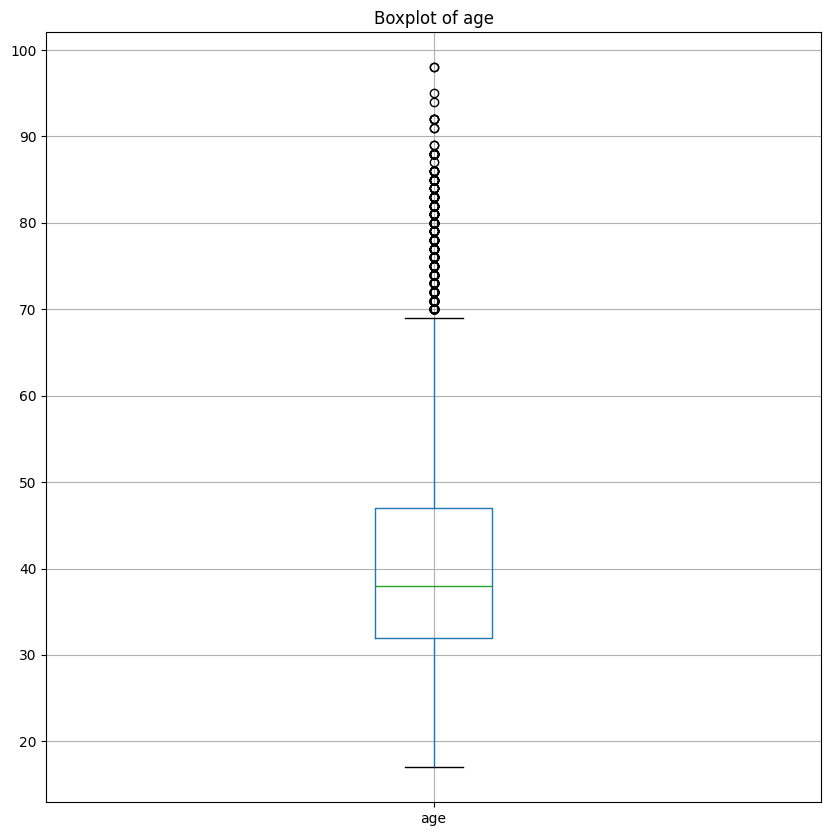

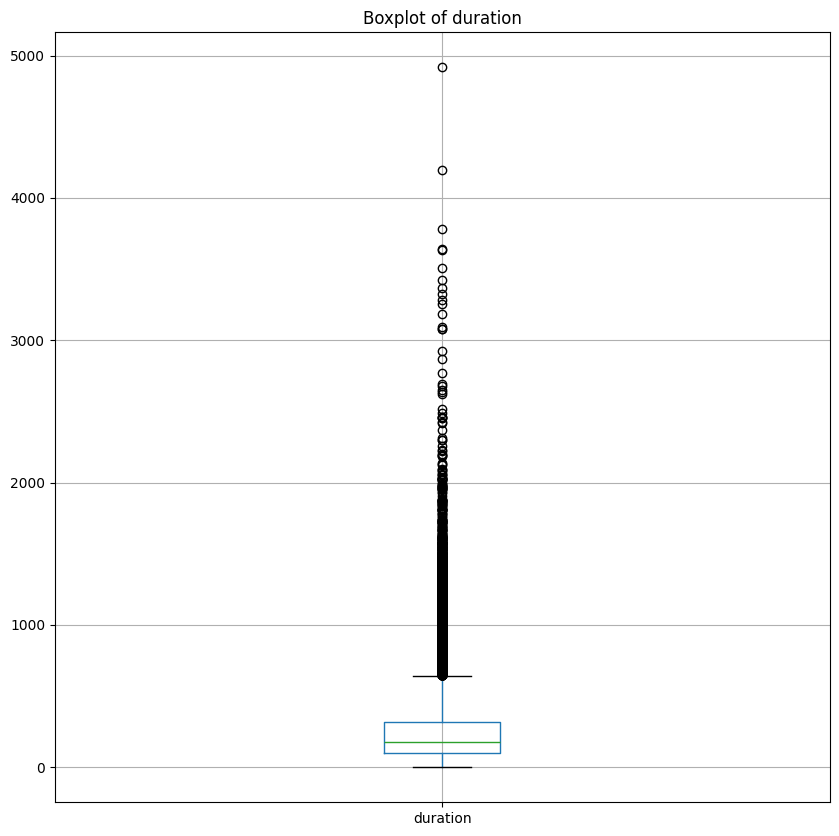

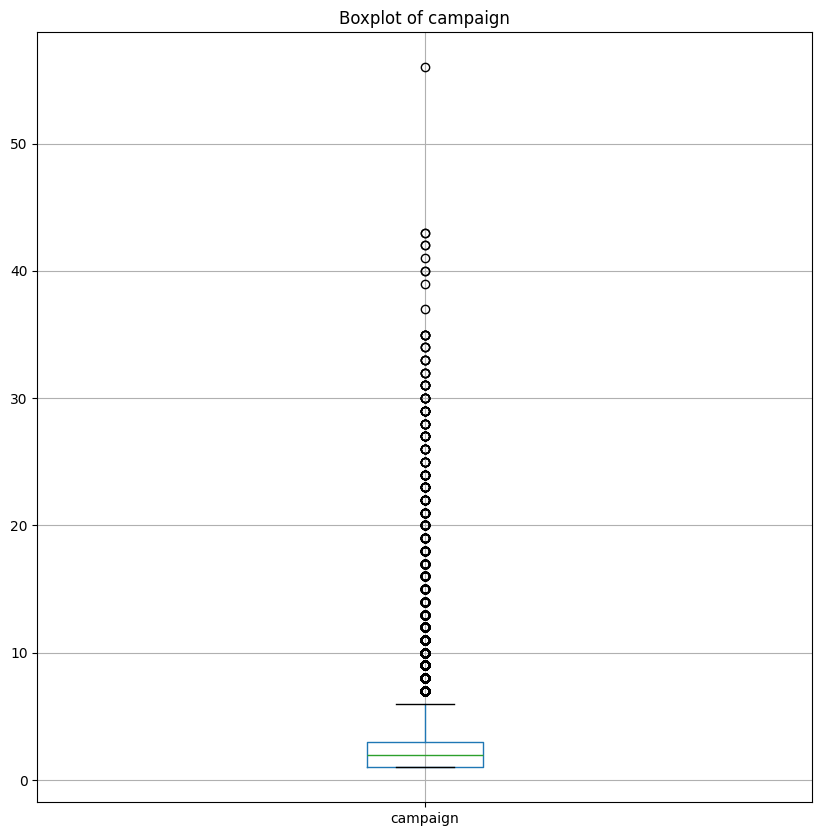

In [26]:
cols = ['age', 'duration', 'campaign']
for col in cols:
    df.boxplot(column=col, figsize=(10, 10))
    plt.title(f'Boxplot of {col}')
    plt.show()

## IQR Function

In [27]:
def clean_with_iqr(df, column, threshold=1.5):
    """
    threshold : float, optional
    Multiplier for the IQR to define the lower/upper bounds
    (default 1.5). Common choices: 1.5 (standard Tukey), larger values are
    more tolerant (fewer points treated as outliers).
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    median_val = df[column].median()

    # create cleaned column (does not drop original)
    cleaned_col = f"{column}_cleaned"
    df[cleaned_col] = df[column].copy()
    df.loc[outliers_mask, cleaned_col] = median_val

    return {
        "original_count": len(df),
        "outliers_count": int(outliers_mask.sum()),
        "outliers_percentage": round(outliers_mask.sum() / len(df) * 100, 2),
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "median": median_val,
        "cleaned_column": cleaned_col,
    }

#### Remove outliers in age

In [28]:
result = clean_with_iqr(df, 'age', threshold=2.8)
print("Cleaning results")
for key, value in result.items():
    print(f"{key}: {value}")

Cleaning results
original_count: 41188
outliers_count: 10
outliers_percentage: 0.02
lower_bound: -10.0
upper_bound: 89.0
median: 38.0
cleaned_column: age_cleaned


### Remove outliers in campaign

In [29]:
result = clean_with_iqr(df, 'campaign', threshold=2)
print("Cleaning results:")
for key, value in result.items():
    print(f"{key}: {value}")

Cleaning results:
original_count: 41188
outliers_count: 1777
outliers_percentage: 4.31
lower_bound: -3.0
upper_bound: 7.0
median: 2.0
cleaned_column: campaign_cleaned


### Remove outliers in duration

In [30]:
result = clean_with_iqr(df, 'duration', threshold=3)
print("Cleaning results")
for key, value in result.items():
    print(f"{key}: {value}")

Cleaning results
original_count: 41188
outliers_count: 1043
outliers_percentage: 2.53
lower_bound: -549.0
upper_bound: 970.0
median: 180.0
cleaned_column: duration_cleaned


# Campaign success rate

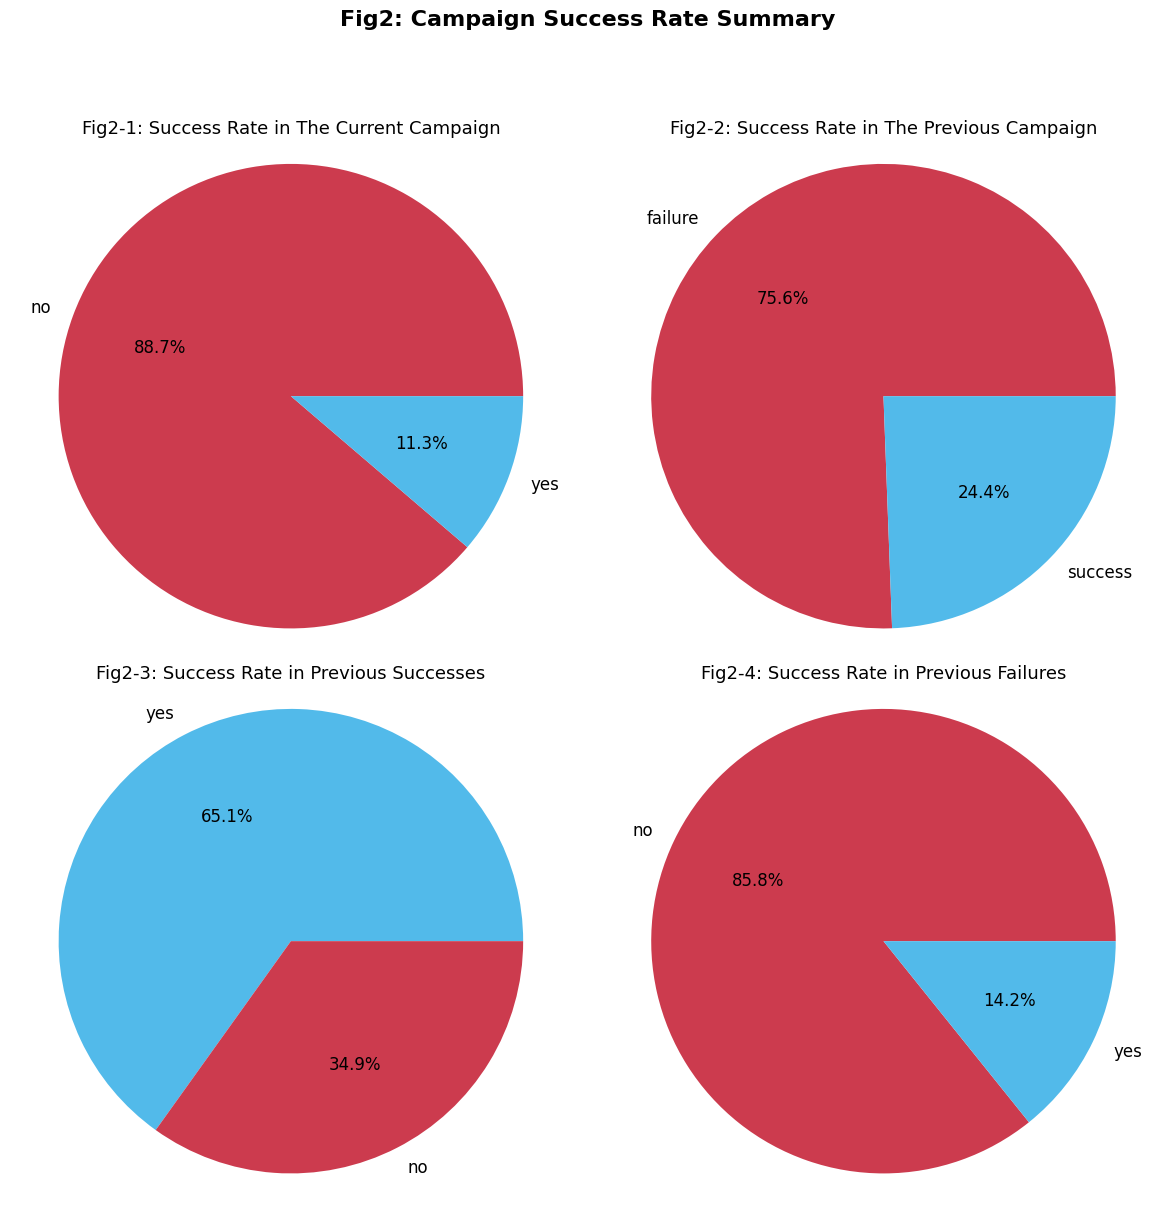

In [31]:
import matplotlib.pyplot as plt

# 🎨 Define custom colors for each category
color_map = {
    'yes': '#52baea',        
    'no': '#cc3b4e',         
    'success': '#52baea',    
    'failure': '#cc3b4e',    
}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.ravel()

# --- 1️⃣ Current campaign
vals = df['y'].value_counts()
colors = [color_map.get(lbl, '#CCCCCC') for lbl in vals.index]
axes[0].pie(vals.values, labels=vals.index, autopct='%1.1f%%',
            colors=colors, textprops={'fontsize': 12})
axes[0].set_title('Fig2-1: Success Rate in The Current Campaign', fontsize=13)
axes[0].axis('equal')

# --- 2️⃣ Previous campaign (excluding nonexistent)
pout_vals = df[df['poutcome'] != 'nonexistent']['poutcome'].value_counts()
colors = [color_map.get(lbl, '#CCCCCC') for lbl in pout_vals.index]
axes[1].pie(pout_vals.values, labels=pout_vals.index, autopct='%1.1f%%',
            colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Fig2-2: Success Rate in The Previous Campaign', fontsize=13)
axes[1].axis('equal')

# --- 3️⃣ After previous successes
succ_vals = df[df['poutcome'] == 'success']['y'].value_counts()
colors = [color_map.get(lbl, '#CCCCCC') for lbl in succ_vals.index]
axes[2].pie(succ_vals.values, labels=succ_vals.index, autopct='%1.1f%%',
            colors=colors, textprops={'fontsize': 12})
axes[2].set_title('Fig2-3: Success Rate in Previous Successes', fontsize=13)
axes[2].axis('equal')

# --- 4️⃣ After previous failures
fail_vals = df[df['poutcome'] == 'failure']['y'].value_counts()
colors = [color_map.get(lbl, '#CCCCCC') for lbl in fail_vals.index]
axes[3].pie(fail_vals.values, labels=fail_vals.index, autopct='%1.1f%%',
            colors=colors, textprops={'fontsize': 12})
axes[3].set_title('Fig2-4: Success Rate in Previous Failures', fontsize=13)
axes[3].axis('equal')

# --- Layout
plt.suptitle('Fig2: Campaign Success Rate Summary', fontsize=16, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [32]:
The_Number_Of_New_Customers = len(df[df['poutcome'] == 'nonexistent'])
The_Number_Of_Previous_Customers = len(df[df['poutcome'] != 'nonexistent'])
Total_Customer = len(df)
print(f"The Number Of New Customers is: {The_Number_Of_New_Customers}")
print(f"The Number Of Previous Customers is: {The_Number_Of_Previous_Customers}")
print(f"Total Customer is: {Total_Customer}")

The Number Of New Customers is: 35563
The Number Of Previous Customers is: 5625
Total Customer is: 41188


### Insight📊:

- The **success rate in the current campaign is 11.3%**, which is a **low number** and indicates **poor performance** of this campaign. We need to improve **our targets and contact list**.

- The **success rate of the current campaign is approximately 13% lower** than the previous campaign, which could be due to the **addition of 35,563 new customers** compared to **5,625 previous customers**, resulting in **increased workload and reduced focus** on all customers.

- Customers who **opened long-term deposit accounts in the previous campaign** have a **65% rate** of opening new deposits again.

- The **probability of opening deposit accounts** by customers who **did not open deposit accounts in the previous campaign** has **decreased by up to 85%** in the current campaign.

# Customer Attributes

## Age Analysis

### Age Distribution

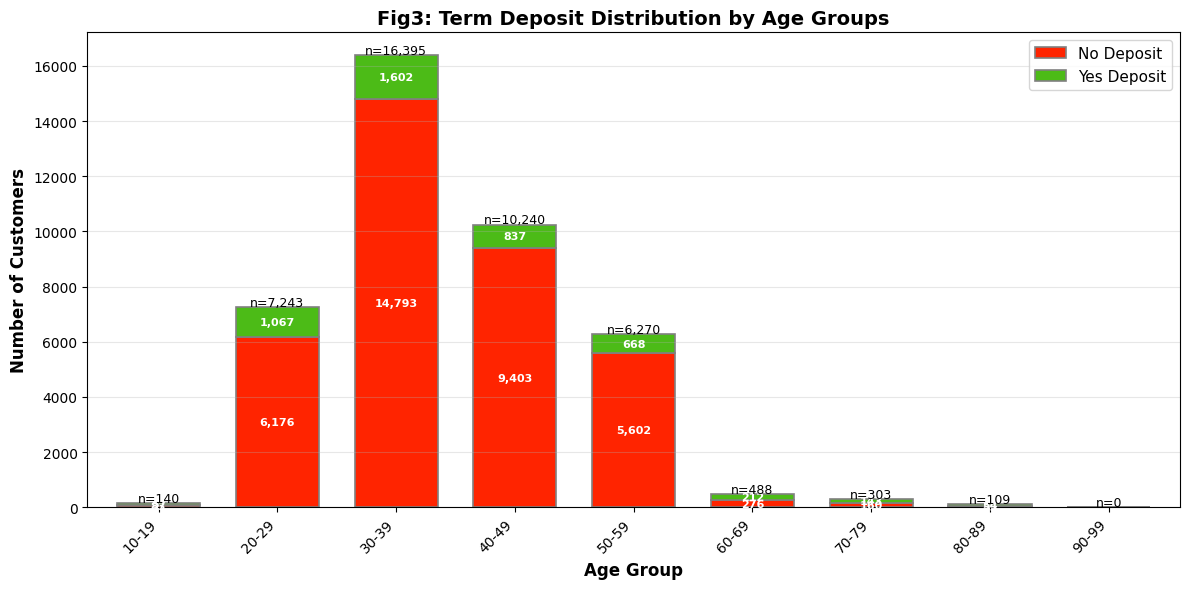

In [33]:
# Create age bins
df['age_bin'] = pd.cut(df['age_cleaned'], bins=range(10, 101, 10), 
                       labels=[f'{i}-{i+9}' for i in range(10, 100, 10)])

# Count yes/no for each bin
age_counts = df.groupby(['age_bin', 'y']).size().unstack(fill_value=0)

# Plot stacked bar
fig, ax = plt.subplots(figsize=(12, 6))
age_counts.plot(kind='bar', stacked=True, ax=ax, 
                color=['#FF2400', '#4CBB17'], width=0.7,
                edgecolor='gray', linewidth=1.2)

# Styling
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax.set_title('Fig3: Term Deposit Distribution by Age Groups', fontsize=14, fontweight='bold')
ax.legend(['No Deposit', 'Yes Deposit'], loc='upper right', fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add numbers on each segment
for i, (no_count, yes_count) in enumerate(zip(age_counts['no'], age_counts['yes'])):
    # Number on red segment (No Deposit)
    if no_count > 0:
        ax.text(i, no_count/2, f'{no_count:,}', ha='center', va='center', 
                fontsize=8, fontweight='bold', color='white')
    
    # Number on green segment (Yes Deposit)
    if yes_count > 0:
        ax.text(i, no_count + yes_count/2, f'{yes_count:,}', ha='center', va='center', 
                fontsize=8, fontweight='bold', color='white')

# Add total count on top of each bar
for i, total in enumerate(age_counts.sum(axis=1)):
    ax.text(i, total + 50, f'n={total:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Term Deposit Rates

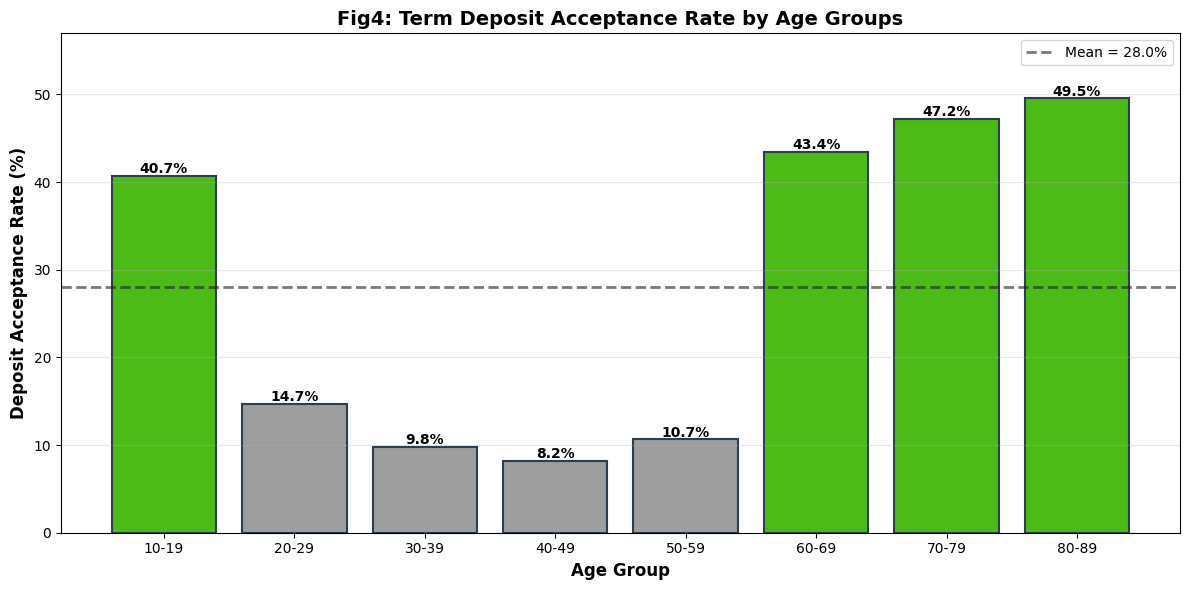

In [34]:
# Calculate percentage for each bin
age_pct = df.groupby('age_bin')['y'].apply(lambda x: (x=='yes').mean() * 100).reset_index()
age_pct.columns = ['age_bin', 'yes_percentage']

# Calculate Mean
Mean = age_pct['yes_percentage'].mean()

# Define colors based on Mean
age_pct['color'] = age_pct['yes_percentage'].apply(
    lambda x: '#4CBB17' if x >= Mean else '#9E9E9E'
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(age_pct['age_bin'], age_pct['yes_percentage'], 
              color=age_pct['color'], edgecolor='#2C3E50', linewidth=1.5)

# Add percentage labels on bars
for bar, pct in zip(bars, age_pct['yes_percentage']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
            f'{pct:.1f}%', ha='center', fontweight='bold', fontsize=10)

# Add Mean line
ax.axhline(y=Mean, color='#222021', linestyle='--', alpha=0.6, 
          label=f'Mean = { Mean:.1f}%', linewidth=2)

# Styling
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Deposit Acceptance Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Fig4: Term Deposit Acceptance Rate by Age Groups', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, max(age_pct['yes_percentage']) * 1.15)

plt.tight_layout()
plt.show()

### Insight📊:
- **Customers under 20 years old** and **older customers approaching retirement age** have achieved **higher deposit rates** due to their **need for financial security**.

- Generally, we observe a **decrease in deposit rates** as age increases **up to 40 years old**, followed by a **significant increase in deposit rates** after this age threshold.

- The **deposit rate of other customer segments** - which represent a **large portion** of the customer base - can be improved through **targeted selection** based on **job and education indicators**.

## Job Analysis

### Customer Distribution

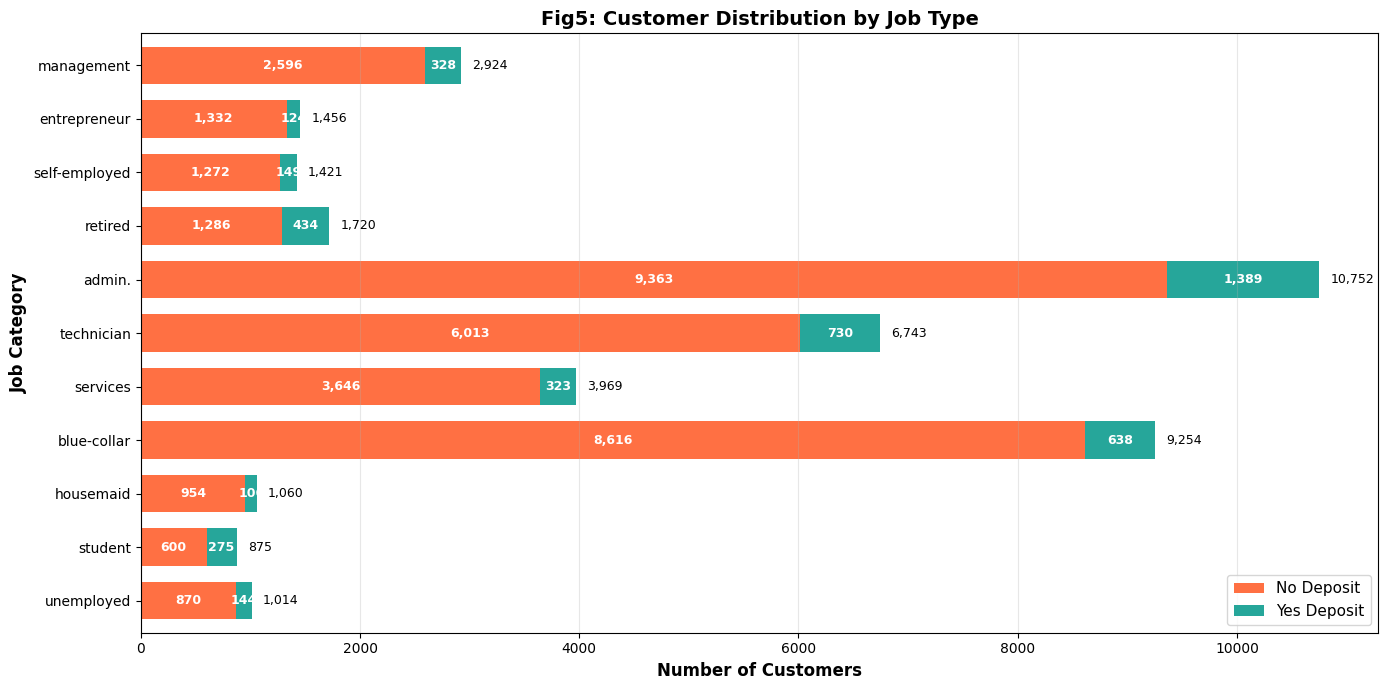

In [35]:
# Define job order
job_order = ['unemployed', 'student', 'housemaid', 'blue-collar', 'services',
             'technician', 'admin.', 'retired', 'self-employed', 
             'entrepreneur', 'management']

# Filter and reorder
job_counts = df.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts = job_counts.reindex(job_order, fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
job_counts.plot(kind='barh', stacked=True, ax=ax,
                color=['#FF7043', '#26A69A'], width=0.7)

# Styling
ax.set_xlabel('Number of Customers', fontsize=12, fontweight='bold')
ax.set_ylabel('Job Category', fontsize=12, fontweight='bold')
ax.set_title('Fig5: Customer Distribution by Job Type', fontsize=14, fontweight='bold')
ax.legend(['No Deposit', 'Yes Deposit'], loc='lower right', fontsize=11)
ax.grid(axis='x', alpha=0.3)

# Add numbers on both segments with different colors
for i, (no_count, yes_count) in enumerate(zip(job_counts['no'], job_counts['yes'])):
    # Number on orange segment (No Deposit) - white text
    if no_count > 0:
        ax.text(no_count/2, i, f'{no_count:,}', ha='center', va='center', 
                fontsize=9, fontweight='bold', color='white')
    
    # Number on teal segment (Yes Deposit) - white text
    if yes_count > 0:
        ax.text(no_count + yes_count/2, i, f'{yes_count:,}', ha='center', va='center', 
                fontsize=9, fontweight='bold', color='white')

# Add totals on the right
for i, (idx, total) in enumerate(job_counts.sum(axis=1).items()):
    ax.text(total + 100, i, f'{total:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Term Deposit Rate

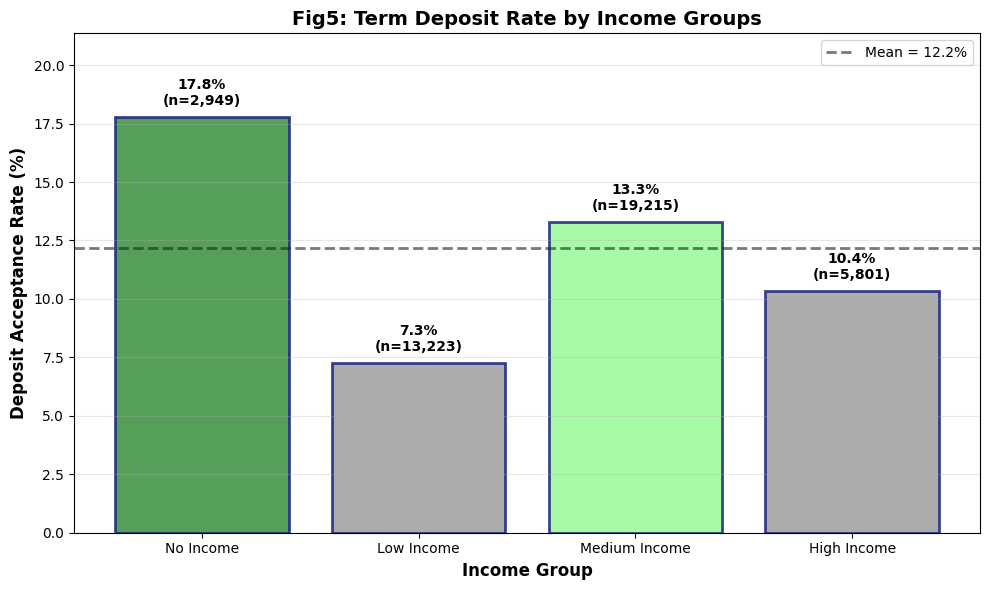

In [36]:
# Define income groups
no_income_jobs = ['unemployed', 'student', 'housemaid']
low_income_jobs = ['blue-collar', 'services']
medium_income_jobs = ['technician', 'admin.', 'retired']
high_income_jobs = ['self-employed', 'entrepreneur', 'management']

# Categorize jobs
def categorize_job(job):
    if job in no_income_jobs: return 'No Income'
    elif job in low_income_jobs: return 'Low Income'
    elif job in medium_income_jobs: return 'Medium Income'
    elif job in high_income_jobs: return 'High Income'
    else: return 'Unknown'

df['income_group'] = df['job'].apply(categorize_job)

# Calculate percentages
income_stats = df[df['income_group'] != 'Unknown'].groupby('income_group').agg({
    'y': [lambda x: (x=='yes').mean() * 100, 'count']
}).round(2)
income_stats.columns = ['yes_pct', 'total_count']

# Order groups
income_order = ['No Income', 'Low Income', 'Medium Income', 'High Income']
income_stats = income_stats.reindex(income_order)

# Calculate Mean
Mean = income_stats['yes_pct'].mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#388E3C','#9E9E9E','#98FB98','#9E9E9E' ]
bars = ax.bar(income_stats.index, income_stats['yes_pct'], 
              color=colors, edgecolor='#1A237E', linewidth=2, alpha=0.85)

# Add labels
for bar, (pct, count) in zip(bars, income_stats.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{pct:.1f}%\n(n={int(count):,})', ha='center', fontweight='bold')

# Add Mean line
ax.axhline(y=Mean, color='#222021', linestyle='--', alpha=0.6, 
          label=f'Mean = {Mean:.1f}%', linewidth=2)    
    
# Styling
ax.set_xlabel('Income Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Deposit Acceptance Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Fig5: Term Deposit Rate by Income Groups', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, max(income_stats['yes_pct']) * 1.2)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

- no income jobs =  **unemployed, student, housemaid**
- low income jobs = **blue-collar, services**
- medium income jobs = **technician, admin., retired**
- high income jobs = **self-employed, entrepreneur, management**

### Insight📊:
- **The majority of individuals** in this dataset are **admin. and blue-collar workers**, with populations of **10,422 and 9,254** people respectively.

- **The deposit rate among individuals with no income** is **significantly higher** than other groups, indicating their **greater willingness to participate** in these deposit schemes.

- Individuals with **medium-income occupations**, comprising approximately **19,000 people** with a **13.3% acceptance rate**, show **good potential for further investment**.

## Education Analysis

### Education Distribution

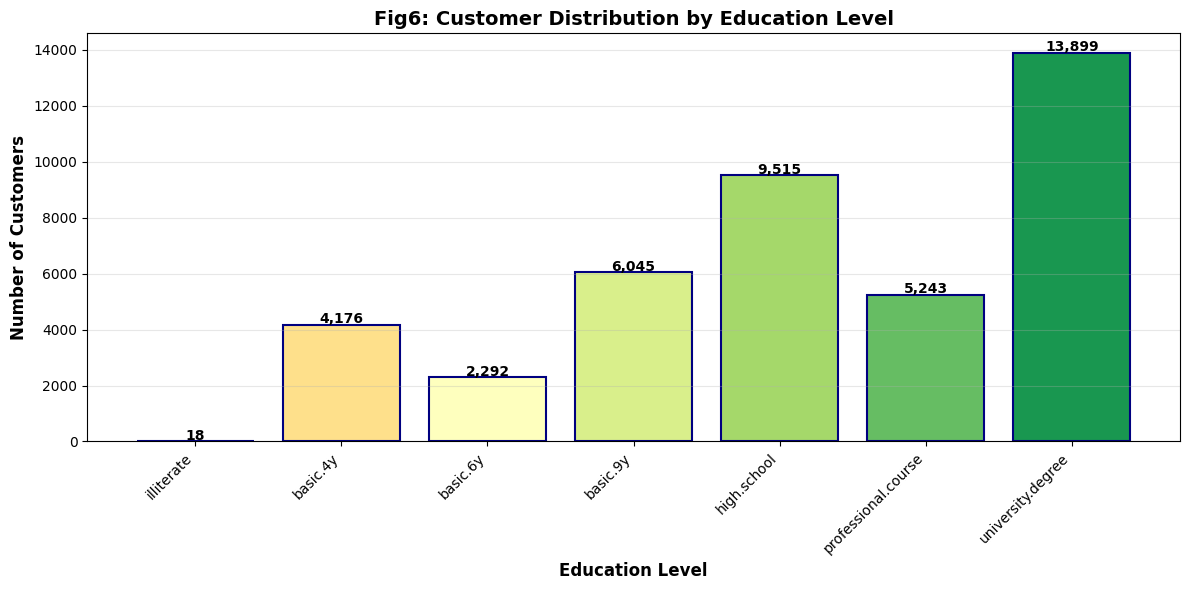

In [37]:
# Define education order (illiterate to most educated)
edu_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
             'high.school', 'professional.course', 'university.degree']

# Count and reorder
edu_counts = df['education'].value_counts()
edu_counts = edu_counts.reindex(edu_order, fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(12,6))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(edu_counts)))
bars = ax.bar(range(len(edu_counts)), edu_counts.values, 
              color=colors, edgecolor='navy', linewidth=1.5)

# Add count labels
for bar, count in zip(bars, edu_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f'{count:,}', ha='center', fontweight='bold', fontsize=10)

# Styling
ax.set_xticks(range(len(edu_counts)))
ax.set_xticklabels(edu_counts.index, rotation=45, ha='right')
ax.set_xlabel('Education Level', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Customers', fontsize=12, fontweight='bold')
ax.set_title('Fig6: Customer Distribution by Education Level', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Term Deposit Rate

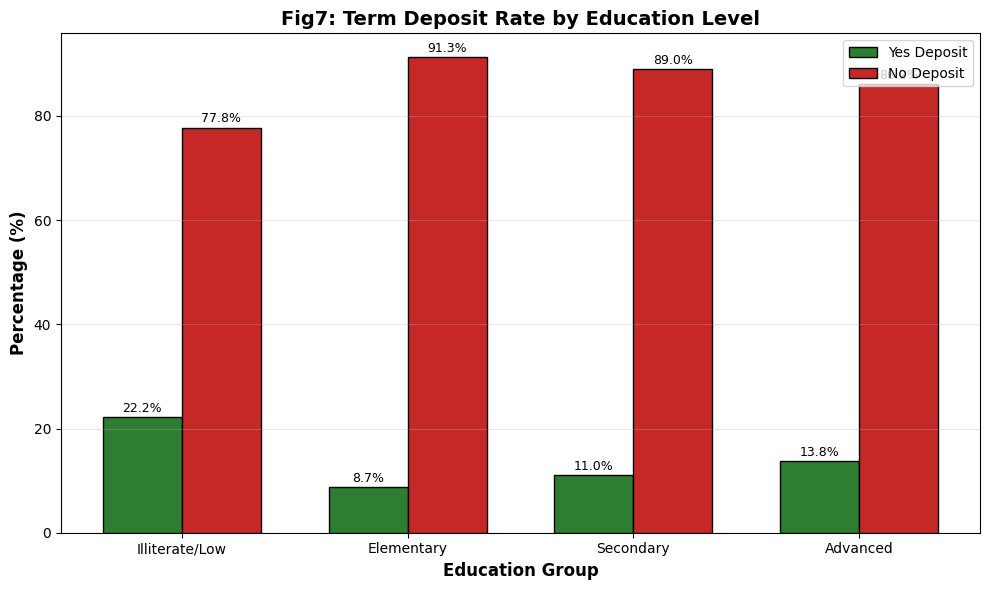

In [38]:
# Define education groups
illiterate_low = ['illiterate']
elementary = ['basic.4y', 'basic.6y', 'basic.9y']
secondary = ['high.school', 'professional.course']
advanced = ['university.degree']

# Categorize education
def categorize_edu(edu):
    if edu in illiterate_low: return 'Illiterate/Low'
    elif edu in elementary: return 'Elementary'
    elif edu in secondary: return 'Secondary'
    elif edu in advanced: return 'Advanced'
    else: return 'Unknown'

df['edu_group'] = df['education'].apply(categorize_edu)

# Calculate percentages
edu_stats = df[df['edu_group'] != 'Unknown'].groupby('edu_group').agg({
    'y': [lambda x: (x=='yes').mean() * 100, 
          lambda x: (x=='no').mean() * 100,
          'count']
}).round(2)
edu_stats.columns = ['yes_pct', 'no_pct', 'total']

# Order groups
edu_order_groups = ['Illiterate/Low', 'Elementary', 'Secondary', 'Advanced']
edu_stats = edu_stats.reindex(edu_order_groups, fill_value=0)

# Plot grouped bar
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(edu_stats))
width = 0.35

bars1 = ax.bar(x - width/2, edu_stats['yes_pct'], width, 
               label='Yes Deposit', color='#2E7D32', edgecolor='black')
bars2 = ax.bar(x + width/2, edu_stats['no_pct'], width,
               label='No Deposit', color='#C62828', edgecolor='black')

# Add labels
for bars, col in [(bars1, 'yes_pct'), (bars2, 'no_pct')]:
    for bar, val in zip(bars, edu_stats[col]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{val:.1f}%', ha='center', fontsize=9)

# Styling
ax.set_xlabel('Education Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('Fig7: Term Deposit Rate by Education Level', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(edu_stats.index)
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

- illiterate_low = **illiterate**
- elementary = **basic.4y, basic.6y , basic.9y**
- secondary = **high.school, professional.course**
- advanced = **university.degree**

### Insight📊:
- **Illiterate individuals** have shown a **higher tendency (22%)** to open term deposit accounts compared to other education levels; although the total number of these individuals is **very low**.

- **secondary and advanced education levels** constitute the **largest portion of our statistical population (approximately 27,000)**. As observed, the **rate of opening deposits increases with higher education levels**. Consequently, these groups have **good potential for further investment**.

### Term Deposit Success Rate by Job and Education

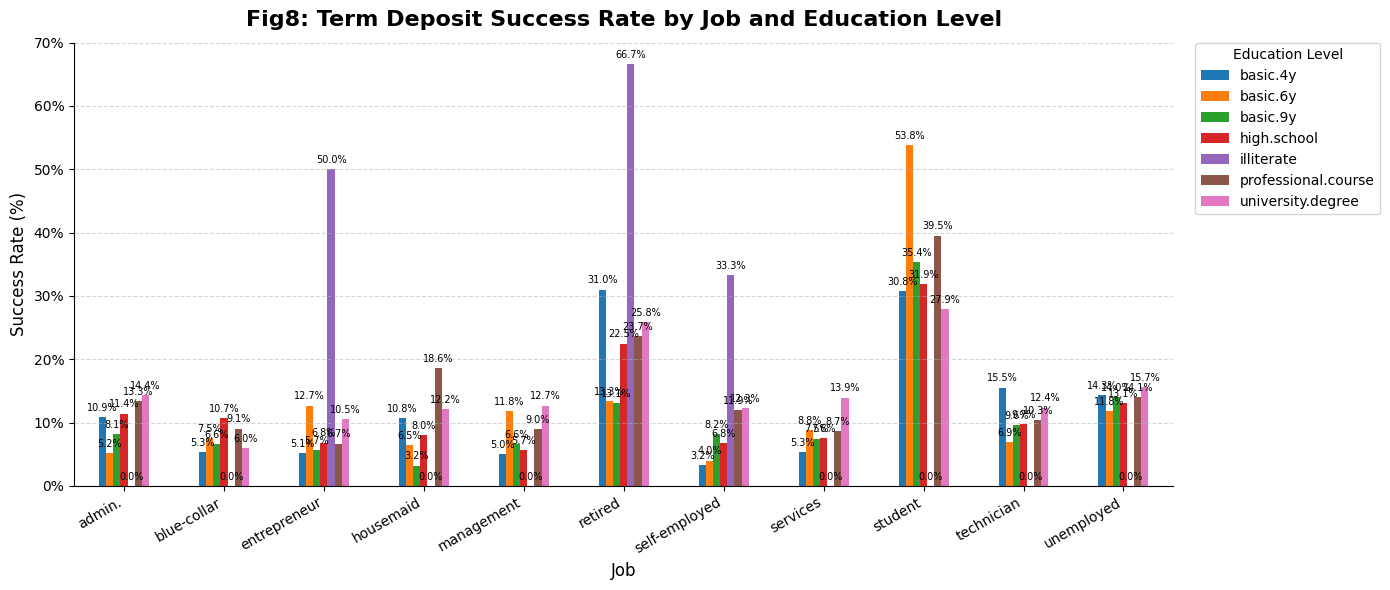

In [39]:
# Prepare data (fill missing values with 0 for clarity)
rates = df.groupby(['job', 'education'])['y'].apply(lambda x: (x == 'yes').mean()).unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
bars = rates.plot.bar(ax=ax)

# Title and subtitle
ax.set_title("Fig8: Term Deposit Success Rate by Job and Education Level",
             fontsize=16, fontweight='bold', pad=12)

# Axis labels
ax.set_xlabel("Job", fontsize=12)
ax.set_ylabel("Success Rate (%)", fontsize=12)

# Legend
ax.legend(title="Education Level", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Grid and styling
ax.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(left=False, right=True, top=True)

# Add percentage labels to bars
for container in ax.containers:
    labels = [f"{bar.get_height() * 100:.1f}%" for bar in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=7, padding=3)

plt.tight_layout()
plt.show()

## Financial Obligations Analysis

### Default, Housing, Loan Distribution

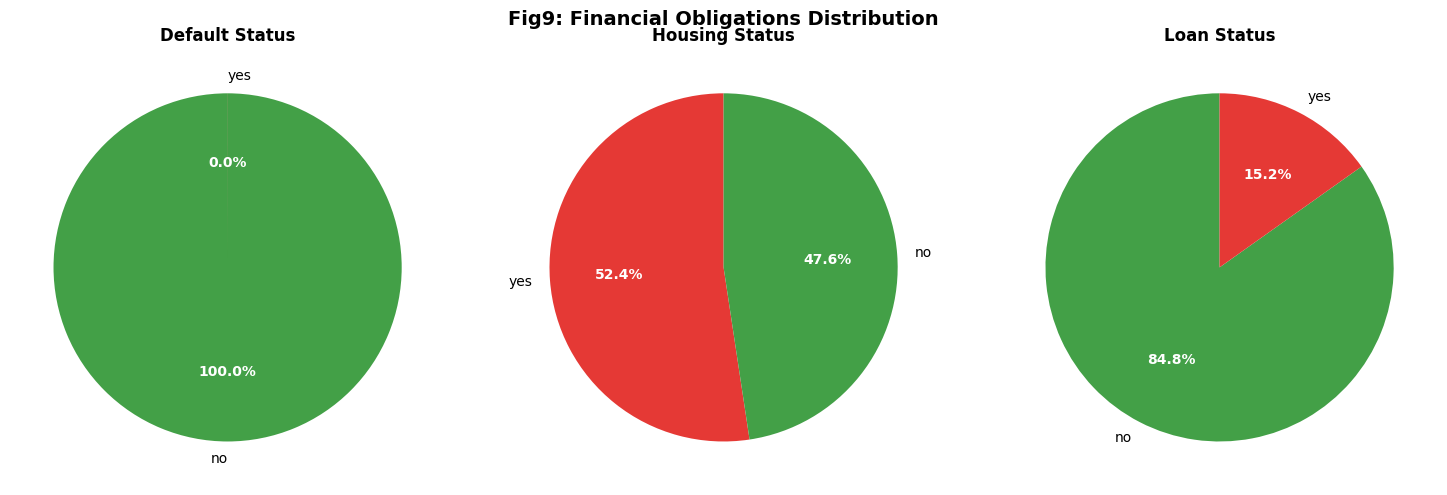

In [40]:
# Prepare data for three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ['default', 'housing', 'loan']
colors_dict = {'yes': '#E53935', 'no': '#43A047', 'unknown': '#FDD835'}

for ax, col in zip(axes, columns):
    # Count values
    counts = df[col].value_counts()
    
    # Plot pie chart
    colors = [colors_dict.get(x, '#9E9E9E') for x in counts.index]
    wedges, texts, autotexts = ax.pie(counts.values, labels=counts.index,
                                       autopct='%1.1f%%', colors=colors,
                                       startangle=90)
    
    # Styling
    ax.set_title(f'{col.capitalize()} Status', fontsize=12, fontweight='bold')
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)

plt.suptitle('Fig9: Financial Obligations Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Impact of Financial Obligations

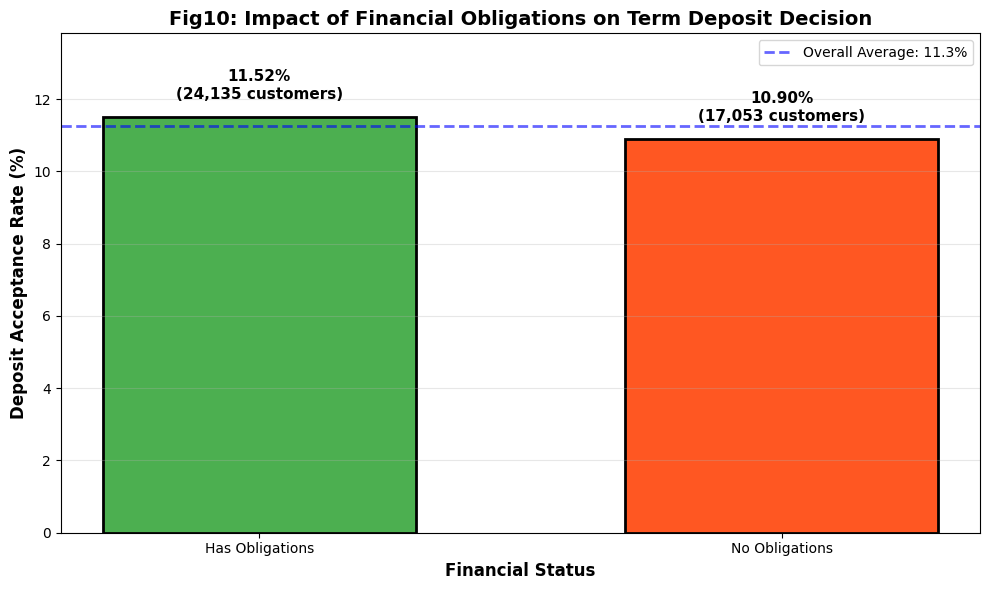

In [41]:
# Create obligation groups
no_financial_obligations = (df['default'] == 'no') & (df['housing'] == 'no') & (df['loan'] == 'no')
has_financial_obligations = (df['default'] == 'yes') | (df['housing'] == 'yes') | (df['loan'] == 'yes')

# Create new column
df['financial_status'] = 'Other'  # for unknown values
df.loc[no_financial_obligations, 'financial_status'] = 'No Obligations'
df.loc[has_financial_obligations, 'financial_status'] = 'Has Obligations'

# Calculate statistics
fin_stats = df[df['financial_status'] != 'Other'].groupby('financial_status').agg({
    'y': [lambda x: (x=='yes').mean() * 100, 'count']
}).round(2)
fin_stats.columns = ['yes_pct', 'total']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#4CAF50', '#FF5722']
bars = ax.bar(fin_stats.index, fin_stats['yes_pct'], 
              color=colors, edgecolor='black', linewidth=2, width=0.6)

# Add detailed labels
for bar, (pct, count) in zip(bars, fin_stats.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{pct:.2f}%\n({int(count):,} customers)', 
            ha='center', fontweight='bold', fontsize=11)

# Add average line
avg_rate = df[df['financial_status'] != 'Other']['y'].apply(lambda x: x=='yes').mean() * 100
ax.axhline(y=avg_rate, color='blue', linestyle='--', alpha=0.6,
          label=f'Overall Average: {avg_rate:.1f}%', linewidth=2)

# Styling
ax.set_xlabel('Financial Status', fontsize=12, fontweight='bold')
ax.set_ylabel('Deposit Acceptance Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Fig10: Impact of Financial Obligations on Term Deposit Decision', 
            fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, max(fin_stats['yes_pct']) * 1.2)

plt.tight_layout()
plt.show()

### Insight📊:

- **52% of individuals have housing loans** and **15% of them have personal loans**

- **Having or not having financial obligations** has **minimal impact (0.6%)** on customers' **willingness or unwillingness to Deposit**

# Last Contact Features

### Marketing Campaign Success Rate by Month and Day of Week

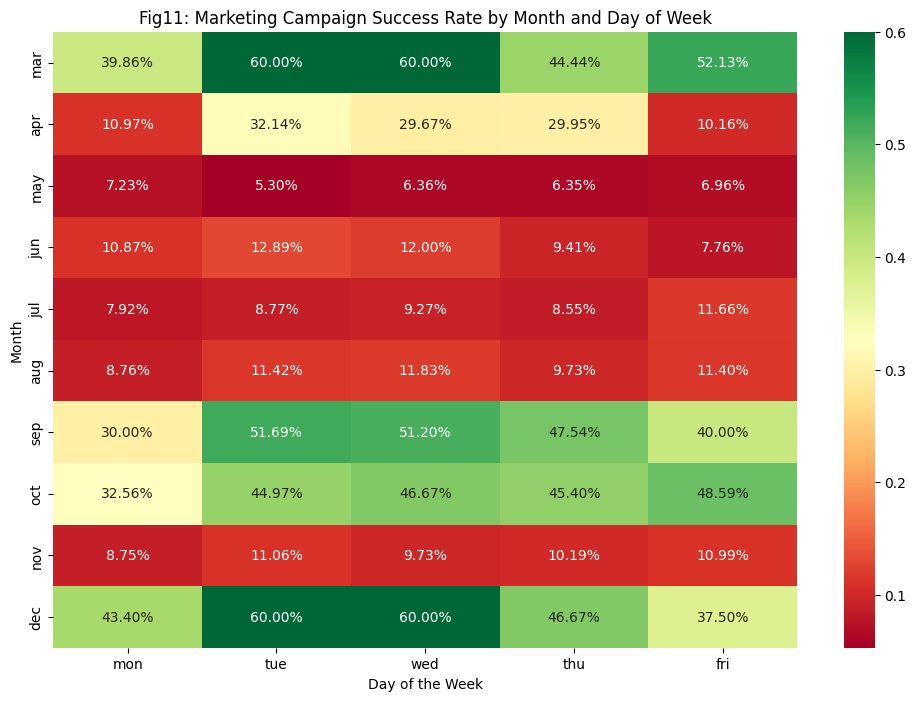

In [42]:
# 1. Define the correct calendar order for the months.
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# 2. Convert the 'month' column to an ordered Categorical type.
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Also, let's sort the days of the week for a more logical column order
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)


# --- Pivot Table and Plotting ---
# 3. Create the pivot table. It will now be sorted correctly.
pivot = df.pivot_table(values='y', 
                       index='month', 
                       columns='day_of_week', 
                       aggfunc=lambda x: (x == 'yes').mean())

# 4. Plot the heatmap with the corrected syntax.
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, 
            annot=True,      # Corrected: Use the boolean value True
            fmt='.2%',       
            cmap='RdYlGn')   
            
plt.title('Fig11: Marketing Campaign Success Rate by Month and Day of Week')
plt.ylabel('Month')
plt.xlabel('Day of the Week')
plt.show()

### Insight📊:

- **March, September, October, and December** clearly show **deposit rates exceeding 40%**, with the **highest success rates** occurring during **mid-week calls** in these months.

#### **Potential reasons for high deposit rates in these months:**
- **December**: Proximity to **Christmas** and receipt of **annual bonuses**
- **September and October**: Following **summer holidays**, people are **more receptive to new financial commitments**
- **March**: **End of the first quarter** often leads to **new financial decision-making**

# Campaign Features

## Success Rate by Contact History (pdays)

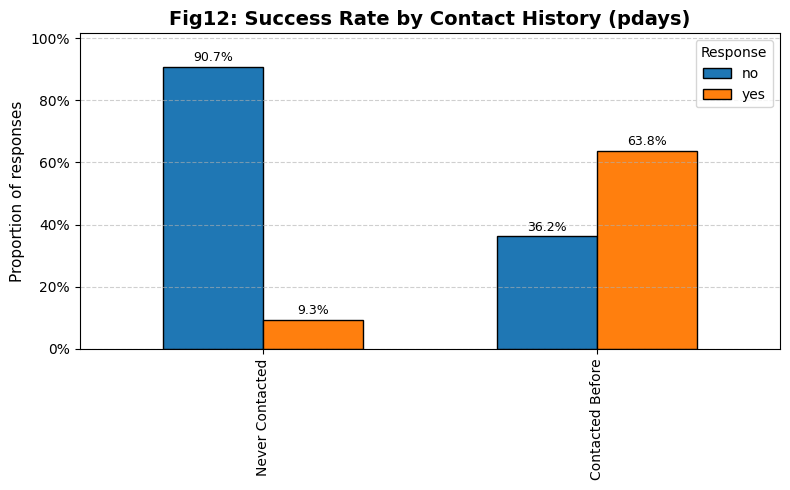

In [43]:
# create category
df['pdays_category'] = df['pdays'].apply(lambda x: 'Never Contacted' if x == 999 else 'Contacted Before')

# compute normalized crosstab (fractions)
rates = pd.crosstab(df['pdays_category'], df['y'], normalize='index').reindex(['Never Contacted','Contacted Before'])

# plot
ax = rates.plot.bar(figsize=(8,5), width=0.6, edgecolor='k')

# formatting
ax.set_title("Fig12: Success Rate by Contact History (pdays)", fontsize=14, fontweight='bold')
ax.set_xlabel("")  # no extra x-label
ax.set_ylabel("Proportion of responses", fontsize=11)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # show percent

# legend and layout
ax.legend(title='Response', loc='upper right')
ax.set_ylim(0, rates.values.max() * 1.12)  # a little headroom for labels
ax.grid(axis='y', linestyle='--', alpha=0.6)

# annotate percent labels on bars
for container in ax.containers:
    labels = [f"{h.get_height()*100:.1f}%" for h in container]
    ax.bar_label(container, labels=labels, label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()


## Deposit Rate by pdays range

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))

# x positions and labels
x = np.arange(len(conv))
y = conv.values
labels = conv.index.astype(str)

ax.plot(x, y, marker='o', linewidth=2, markersize=7,
        color='#FFD700', markerfacecolor='#FFD700', markeredgecolor='#333333', zorder=4)

# ticks / labels
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.set_title('Fig13: Deposit Rate by pdays range', fontsize=12, fontweight='bold')
ax.set_xlabel('pdays range')
ax.set_ylabel('Deposit rate')

# --- Grid styling: major horizontal grid and subtle vertical grid ---
ax.grid(which='major', axis='y', linestyle='--', linewidth=0.9, alpha=0.7)   # horizontal grid
ax.grid(which='major', axis='x', linestyle=':', linewidth=0.5, alpha=0.7)    # vertical grid
ax.set_axisbelow(True)  # draw grid below the line/markers

# Add sample size (n) labels to each point
for i, (yy, n) in enumerate(zip(y, counts.values)):
    ax.text(i, yy + max(y) * 0.03, f'n={int(n):,}', ha='center', va='bottom',
            fontsize=10, color='#191970', fontweight='bold', zorder=5)

# --- Draw three horizontal lines that pass through:
target_indices = [0, 2, 3]                # 0-based indices: 1st, 3rd, 4th groups
# ensure indices exist in case there are fewer bins
target_indices = [i for i in target_indices if i < len(y)]

hline_colors = ['#2E8B57', '#FF0000', '#2E8B57']  # green, red, green
hline_styles = ['--', '--', '--']

for idx, col, ls in zip(target_indices, hline_colors, hline_styles):
    val = y[idx]
    ax.axhline(y=val, color=col, linestyle=ls, linewidth=1.6, alpha=0.9, zorder=2)
    # annotate line on the right side with group label and percentage
    ax.text(x[-1] + 0.25, val, f"({val:.1%})", va='top', ha='left',
            fontsize=9, color=col, fontweight='semibold')

# expand x-limits a bit to make room for annotations
ax.set_xlim(-0.3, x[-1] + 0.9)

plt.tight_layout()
plt.show()


NameError: name 'conv' is not defined

### Insight📊:
- Customers marked with **value 999 in the pdays column** have **never been contacted before**.
- Customers who have been **contacted previously** have a **higher probability of making deposits**. Therefore, we should **prioritize contacting them**.
- The **strategy for contacting previous customers** will be explained in the following sections.
- **Recontacting customers** within **less than 1 week** or **after 3 weeks** can lead to a **higher success rate**.

## campaign Analysis

### Deposit Rate by Number of Contacts

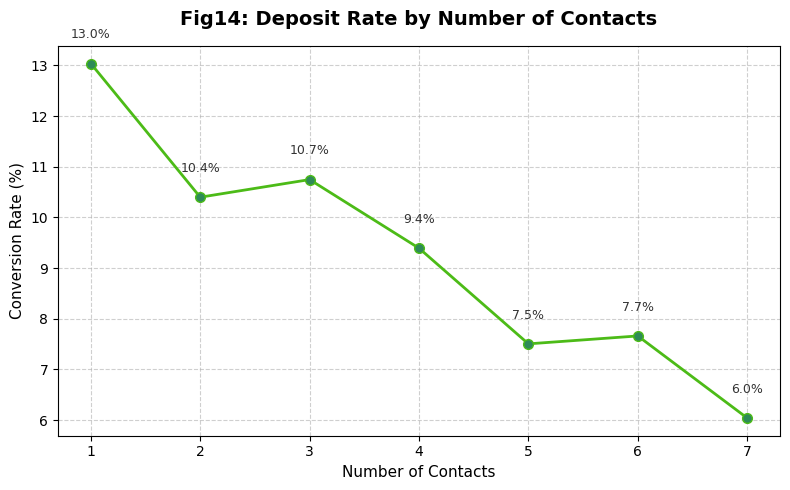

In [46]:
conv_by_campaign = df.groupby('campaign_cleaned')['y'].apply(lambda x: (x=='yes').mean()*100)

plt.figure(figsize=(8,5))
plt.plot(conv_by_campaign.index, conv_by_campaign.values,
         marker='o', markersize=7, linewidth=2, color='#4CBB17', markerfacecolor='#2E8B57')

plt.title("Fig14: Deposit Rate by Number of Contacts", fontsize=14, pad=15, weight='bold')
plt.xlabel("Number of Contacts", fontsize=11)
plt.ylabel("Conversion Rate (%)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)

# Show percentage labels on points
for x, y in zip(conv_by_campaign.index, conv_by_campaign.values):
    plt.text(x, y + 0.5, f"{y:.1f}%", ha='center', fontsize=9, color='#333333')

plt.tight_layout()
plt.show()

### Insight📊:
- The **deposit rate shows a slight increase after the third contact attempt**, but **further contact attempts lead to a sharp decline** in success rates. Therefore, it is **recommended to implement a 6-month waiting period** after the third contact before initiating subsequent attempts.

### Call Duration Distribution by Subscription Outcome

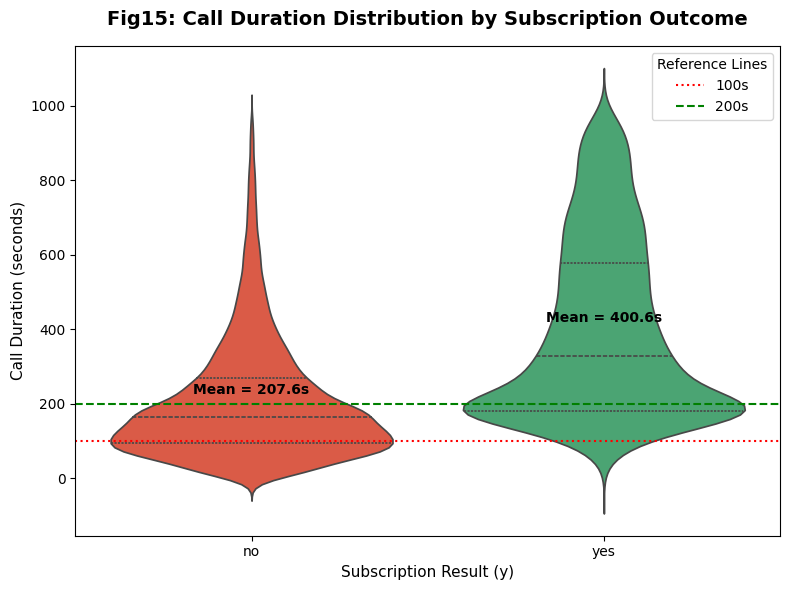

In [47]:
plt.figure(figsize=(8, 6))

ax = sns.violinplot(
    data=df, 
    x='y', 
    y='duration_cleaned',
    cut=3,
    inner='quartile',  # show quartiles inside violins
    palette=['#f2492e', '#3CB371']
)

# Display mean for each group
groups = df['y'].unique()
for i, group in enumerate(groups):
    mean_val = df.loc[df['y'] == group, 'duration_cleaned'].mean()
    ax.text(i, mean_val + 10, 
            f"Mean = {mean_val:.1f}s", 
            color='black', 
            ha='center', 
            va='bottom',
            fontsize=10,
            fontweight='bold')

# Reference lines
ax.axhline(y=100, color='red', linestyle=':', linewidth=1.5, label='100s')
ax.axhline(y=200, color='green', linestyle='--', linewidth=1.5, label='200s')

# Labels and title
plt.title('Fig15: Call Duration Distribution by Subscription Outcome', fontsize=14, pad=15, weight='bold')
plt.xlabel('Subscription Result (y)', fontsize=11)
plt.ylabel('Call Duration (seconds)', fontsize=11)
ax.legend(title="Reference Lines", loc='upper right')

plt.tight_layout()
plt.show()

### Insight📊:
- A **large volume of unsuccessful campaign data** clusters around **100 seconds**, while **successful campaign data** concentrates around **200 seconds**.

- **Calls with longer average duration** are **more likely to result in success**.

- **Predicting campaign success based on call duration is not feasible** since we **cannot determine call length beforehand**. However, we can **increase both call duration (Approaching with 400 S) and success probability** by implementing **advanced marketing techniques**.

# Social and Economic Context Attributes

### Correlation Matrix of Economic Indicators

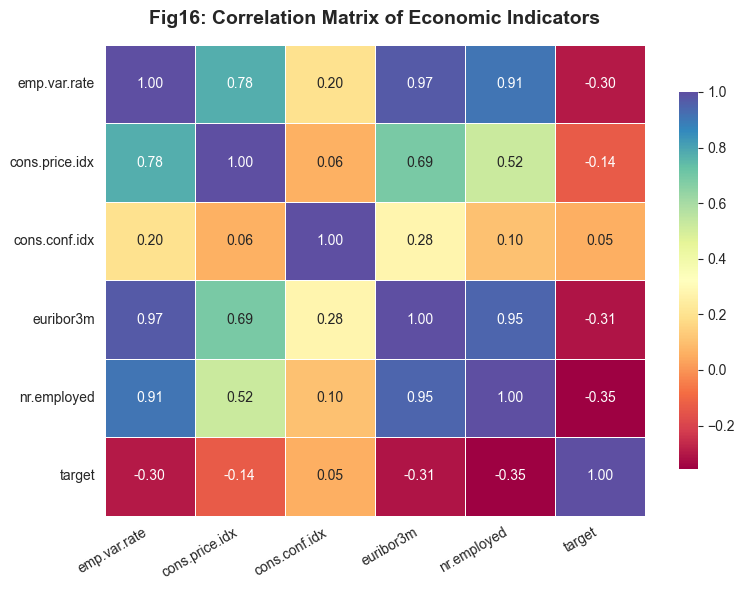

In [48]:
# Prepare data
economic_df = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
economic_df['target'] = (df['y'] == 'yes').astype(int)

# Plot
plt.figure(figsize=(8, 6))
sns.set_style("white")

ax = sns.heatmap(
    economic_df.corr(),
    annot=True,
    cmap='Spectral',
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={'shrink': 0.8}
)

plt.title("Fig16: Correlation Matrix of Economic Indicators", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight📊:

- The chart shows that when **nr.employed**, **euribor3m**, and **emp.var.rate** are **lower**, the probability of deposit placement (**y = yes**) is **slightly higher** (negative correlations of approximately **-0.3 to -0.35**).

- The variables **emp.var.rate**, **euribor3m**, and **nr.employed** have **high correlations** with each other. Therefore, it's better to use only **one of them** during modeling, specifically **euribor3m** since it has a **higher correlation** with both other indicators.

- This matrix examines **linear relationships**, and we will also examine the **nonlinear effects** of these indicators.

# Machine learning modeling

## Data preprocessing

### Removing inefficient and added columns from previous analyses

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               41188 non-null  int64   
 1   job               41188 non-null  object  
 2   marital           41188 non-null  object  
 3   education         41188 non-null  object  
 4   default           41188 non-null  object  
 5   housing           41188 non-null  object  
 6   loan              41188 non-null  object  
 7   contact           41188 non-null  object  
 8   month             41188 non-null  category
 9   day_of_week       41188 non-null  category
 10  duration          41188 non-null  int64   
 11  campaign          41188 non-null  int64   
 12  pdays             41188 non-null  int64   
 13  previous          41188 non-null  int64   
 14  poutcome          41188 non-null  object  
 15  emp.var.rate      41188 non-null  float64 
 16  cons.price.idx    4118

In [50]:
new_df = df.drop(columns=['age_bin', 'income_group', 'edu_group', 'financial_status', 'pdays_category', 'age', 'campaign'], errors='ignore')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job               41188 non-null  object  
 1   marital           41188 non-null  object  
 2   education         41188 non-null  object  
 3   default           41188 non-null  object  
 4   housing           41188 non-null  object  
 5   loan              41188 non-null  object  
 6   contact           41188 non-null  object  
 7   month             41188 non-null  category
 8   day_of_week       41188 non-null  category
 9   duration          41188 non-null  int64   
 10  pdays             41188 non-null  int64   
 11  previous          41188 non-null  int64   
 12  poutcome          41188 non-null  object  
 13  emp.var.rate      41188 non-null  float64 
 14  cons.price.idx    41188 non-null  float64 
 15  cons.conf.idx     41188 non-null  float64 
 16  euribor3m         4118

### Remove 'duration' column to prevent data leakage

In [51]:
new_df = new_df.drop(columns=['duration', 'duration_cleaned'])
print("'duration' column has been removed to prevent data leakage.")

'duration' column has been removed to prevent data leakage.


### Separate features and target

In [52]:
X = new_df.drop('y', axis=1)
y = new_df['y']

print("="*80)
print("FEATURE AND TARGET SEPARATION")
print("="*80)
print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print("\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget proportions:")
print(y.value_counts(normalize=True))

FEATURE AND TARGET SEPARATION

Features (X) shape: (41188, 19)
Target (y) shape: (41188,)

Target distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Target proportions:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


### FEATURE ENGINEERING - PDAYS

In [53]:
# Transform pdays column
X['pdays'] = X['pdays'].apply(lambda x: 0 if x == 999 else 1)
X.rename(columns={'pdays': 'contacted_previously'}, inplace=True)

print("="*80)
print("FEATURE ENGINEERING: PDAYS")
print("="*80)
print("✓ Column 'pdays' converted to 'contacted_previously'")
print(f"\nValue distribution:")
print(X['contacted_previously'].value_counts())
print(f"\n   0 = Not contacted before")
print(f"   1 = Contacted before")

FEATURE ENGINEERING: PDAYS
✓ Column 'pdays' converted to 'contacted_previously'

Value distribution:
contacted_previously
0    39673
1     1515
Name: count, dtype: int64

   0 = Not contacted before
   1 = Contacted before


- Convert pdays (999 = not contacted) to binary feature

### ENCODE TARGET VARIABLE

In [54]:
# Encode target
le = LabelEncoder()
y = le.fit_transform(y)

print("="*80)
print("TARGET VARIABLE ENCODING")
print("="*80)
print("✓ Target variable encoded to numeric format")
print(f"\nEncoding mapping:")
print(f"   'no'  → 0")
print(f"   'yes' → 1")

print(f"\nClass distribution after encoding:")
unique, counts = np.unique(y, return_counts=True)
for val, count in zip(unique, counts):
    print(f"   Class {val}: {count:,} ({count/len(y)*100:.1f}%)")
    
print(f"\nImbalance ratio: {counts[0]/counts[1]:.2f}:1")

TARGET VARIABLE ENCODING
✓ Target variable encoded to numeric format

Encoding mapping:
   'no'  → 0
   'yes' → 1

Class distribution after encoding:
   Class 0: 36,548 (88.7%)
   Class 1: 4,640 (11.3%)

Imbalance ratio: 7.88:1


### ENCODE CATEGORICAL VARIABLES

In [55]:
print("="*80)
print("CATEGORICAL ENCODING")
print("="*80)

# Ordinal Encoding for ordered categories
print("\n1. Ordinal Encoding:")

education_map = {
    'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3,
    'high.school': 4, 'professional.course': 5, 'university.degree': 6
}
X['education'] = X['education'].map(education_map)
print(f"   ✓ 'education' encoded (0-6)")

# Cyclical Encoding for 'month' (seasonal pattern)
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
X['month_num'] = X['month'].map(month_map).astype(int)
X['month_sin'] = np.sin(2 * np.pi * X['month_num'] / 12)
X['month_cos'] = np.cos(2 * np.pi * X['month_num'] / 12)
X = X.drop(['month', 'month_num'], axis=1)
print(f"   ✓ 'month' converted to cyclical features (month_sin, month_cos)")

# Cyclical Encoding for 'day_of_week' (weekly pattern)
day_map = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
X['day_num'] = X['day_of_week'].map(day_map).astype(int)
X['day_of_week_sin'] = np.sin(2 * np.pi * X['day_num'] / 5)
X['day_of_week_cos'] = np.cos(2 * np.pi * X['day_num'] / 5)
X = X.drop(['day_of_week', 'day_num'], axis=1)
print(f"   ✓ 'day_of_week' converted to cyclical features (day_sin, day_cos)")

# One-Hot Encoding for nominal categories
print("\n2. One-Hot Encoding:")
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"   Columns to encode: {list(categorical_cols)}")

if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"   ✓ One-hot encoding completed")

print(f"\n✓ Total features after encoding: {X.shape[1]}")

CATEGORICAL ENCODING

1. Ordinal Encoding:
   ✓ 'education' encoded (0-6)
   ✓ 'month' converted to cyclical features (month_sin, month_cos)
   ✓ 'day_of_week' converted to cyclical features (day_sin, day_cos)

2. One-Hot Encoding:
   Columns to encode: ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
   ✓ One-hot encoding completed

✓ Total features after encoding: 32


### TRAIN-TEST SPLIT

In [56]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"\nTraining set:")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   Class 0: {sum(y_train==0):,}")
print(f"   Class 1: {sum(y_train==1):,}")

print(f"\nTest set:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"   Class 0: {sum(y_test==0):,}")
print(f"   Class 1: {sum(y_test==1):,}")

print(f"\n✓ Data split completed (80/20 with stratification)")

TRAIN-TEST SPLIT

Training set:
   X_train shape: (32950, 32)
   y_train shape: (32950,)
   Class 0: 29,238
   Class 1: 3,712

Test set:
   X_test shape: (8238, 32)
   y_test shape: (8238,)
   Class 0: 7,310
   Class 1: 928

✓ Data split completed (80/20 with stratification)


### FEATURE SCALING

In [57]:
# Define columns to scale
cols_to_scale = ['age_cleaned', 'campaign_cleaned', 'previous', 
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                 'euribor3m', 'nr.employed', 'education', 
                 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos']

# Keep only existing columns
cols_to_scale_existing = [col for col in cols_to_scale if col in X_train.columns]

print("="*80)
print("FEATURE SCALING")
print("="*80)
print(f"\nColumns to scale: {len(cols_to_scale_existing)}")
for col in cols_to_scale_existing:
    print(f"   • {col}")

# Apply scaling
scaler = StandardScaler()
X_train[cols_to_scale_existing] = scaler.fit_transform(X_train[cols_to_scale_existing])
X_test[cols_to_scale_existing] = scaler.transform(X_test[cols_to_scale_existing])

print(f"\n✓ Scaling completed")
print(f"\nSample statistics after scaling (first numeric column):")
sample_col = cols_to_scale_existing[0]
print(f"   {sample_col}:")
print(f"      Mean:  {X_train[sample_col].mean():.6f} (should be ≈ 0)")
print(f"      Std:   {X_train[sample_col].std():.6f} (should be ≈ 1)")

FEATURE SCALING

Columns to scale: 13
   • age_cleaned
   • campaign_cleaned
   • previous
   • emp.var.rate
   • cons.price.idx
   • cons.conf.idx
   • euribor3m
   • nr.employed
   • education
   • month_sin
   • month_cos
   • day_of_week_sin
   • day_of_week_cos

✓ Scaling completed

Sample statistics after scaling (first numeric column):
   age_cleaned:
      Mean:  -0.000000 (should be ≈ 0)
      Std:   1.000015 (should be ≈ 1)


### HYPERPARAMETER TUNING

In [58]:
import time

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

print("="*80)
print("HYPERPARAMETER OPTIMIZATION")
print("="*80)
print(f"\nParameter search space:")
for param, values in param_dist.items():
    print(f"   {param}: {values}")

print(f"\nTotal combinations to try: 50 (random sampling)")
print(f"Cross-validation folds: 3")
print(f"Scoring metric: F1-score")

# Create model
rf = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_dist, 
    n_iter=20, 
    cv=3, 
    scoring='f1',
    random_state=42, 
    n_jobs=-1,
    verbose=2
)

# Start training
print("\n" + "="*80)
print("⏳ STARTING OPTIMIZATION - Please wait...")
print("="*80)
start_time = time.time()

random_search.fit(X_train, y_train)

elapsed_time = time.time() - start_time

print("\n" + "="*80)
print("✓ OPTIMIZATION COMPLETED!")
print("="*80)
print(f"Time elapsed: {elapsed_time/60:.2f} minutes")

# Get best model
best_rf_model = random_search.best_estimator_

print(f"\nBest parameters found:")
for param, value in random_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"\nBest cross-validation F1-score: {random_search.best_score_:.4f}")

HYPERPARAMETER OPTIMIZATION

Parameter search space:
   n_estimators: [100, 200, 300]
   max_depth: [10, 20, 30, None]
   min_samples_split: [2, 5, 10]
   min_samples_leaf: [1, 2, 4]
   class_weight: ['balanced', 'balanced_subsample']

Total combinations to try: 50 (random sampling)
Cross-validation folds: 3
Scoring metric: F1-score

⏳ STARTING OPTIMIZATION - Please wait...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

✓ OPTIMIZATION COMPLETED!
Time elapsed: 0.43 minutes

Best parameters found:
   n_estimators: 100
   min_samples_split: 10
   min_samples_leaf: 4
   max_depth: None
   class_weight: balanced_subsample

Best cross-validation F1-score: 0.4955


### OVERFITTING CHECK & MODEL EVALUATION

In [62]:
print("="*80)
print("OVERFITTING CHECK")
print("="*80)

# Predictions
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Calculate metrics
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Display results
print(f"\nF1 Score:")
print(f"   Training:  {f1_train:.4f}")
print(f"   Test:      {f1_test:.4f}")
print(f"   Gap:       {f1_train - f1_test:.4f} ({(f1_train-f1_test)*100:.1f}%)")

print(f"\nAccuracy:")
print(f"   Training:  {accuracy_train:.4f}")
print(f"   Test:      {accuracy_test:.4f}")
print(f"   Gap:       {accuracy_train - accuracy_test:.4f} ({(accuracy_train-accuracy_test)*100:.1f}%)")

# Interpretation
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)
gap = f1_train - f1_test
if f1_test < 0.5 and f1_train < 0.5:
    print("⚠️  WARNING: Underfitting detected!")
    print("    → Scores are low on both training and test data")
    print("    → Try: More complex model, more features, less regularization")
elif gap > 0.1:
    print("⚠️  WARNING: Overfitting detected!")
    print(f"    → Performance gap ({gap*100:.1f}%) is significant")
    print("    → Try: More regularization, less complex model, more data")
else:
    print("✓ GOOD FIT!")
    print(f"    → Performance gap ({gap*100:.1f}%) is acceptable")
    print("    → Model generalizes well to unseen data")

# Detailed classification report
print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred_test, target_names=le.classes_))

# Save predictions for confusion matrix
accuracy_best = accuracy_test
conf_matrix_best = confusion_matrix(y_test, y_pred_test)

print(f"\nOverall Accuracy: {accuracy_best:.4f}")

OVERFITTING CHECK

F1 Score:
   Training:  0.6184
   Test:      0.5191
   Gap:       0.0993 (9.9%)

Accuracy:
   Training:  0.8971
   Test:      0.8747
   Gap:       0.0223 (2.2%)

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
✓ GOOD FIT!
    → Performance gap (9.9%) is acceptable
    → Model generalizes well to unseen data

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          no       0.95      0.91      0.93      7310
         yes       0.46      0.60      0.52       928

    accuracy                           0.87      8238
   macro avg       0.70      0.75      0.72      8238
weighted avg       0.89      0.87      0.88      8238


Overall Accuracy: 0.8747


### CONFUSION MATRIX VISUALIZATION

CONFUSION MATRIX VISUALIZATION
✓ Confusion matrix saved: confusion_matrix.png


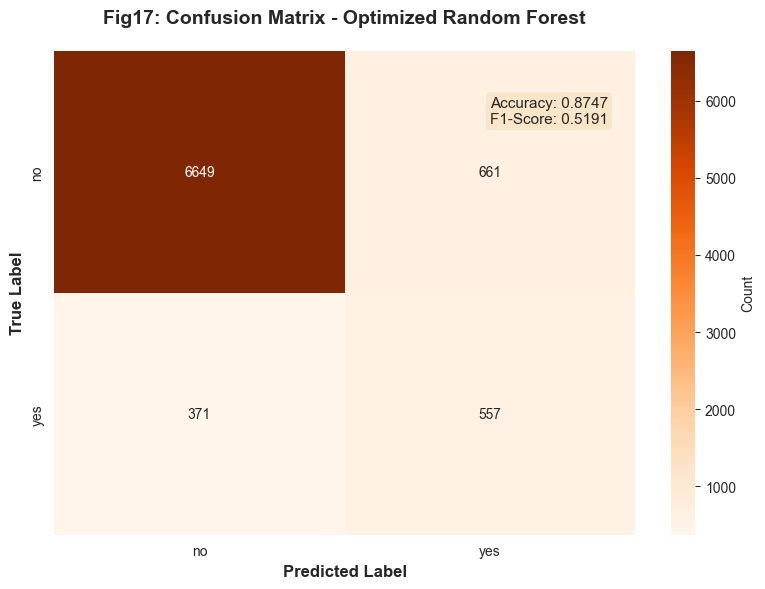


Confusion Matrix Breakdown:
   True Negatives (TN):  6,649
   False Positives (FP): 661
   False Negatives (FN): 371
   True Positives (TP):  557

Additional Metrics:
   Sensitivity (Recall): 0.6002
   Specificity:          0.9096


In [63]:
print("="*80)
print("CONFUSION MATRIX VISUALIZATION")
print("="*80)

# Create figure
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(conf_matrix_best, 
            annot=True, 
            fmt='d', 
            cmap='Oranges', 
            xticklabels=le.classes_, 
            yticklabels=le.classes_,
            cbar_kws={'label': 'Count'})

# Labels and title
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Fig17: Confusion Matrix - Optimized Random Forest', 
          fontsize=14, fontweight='bold', pad=20)

# Add performance metrics as text
textstr = f'Accuracy: {accuracy_best:.4f}\n'
textstr += f'F1-Score: {f1_test:.4f}'
plt.text(1.5, 0.3, textstr, fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("✓ Confusion matrix saved: confusion_matrix.png")
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Breakdown:")
print(f"   True Negatives (TN):  {conf_matrix_best[0,0]:,}")
print(f"   False Positives (FP): {conf_matrix_best[0,1]:,}")
print(f"   False Negatives (FN): {conf_matrix_best[1,0]:,}")
print(f"   True Positives (TP):  {conf_matrix_best[1,1]:,}")

# Calculate additional metrics
tn, fp, fn, tp = conf_matrix_best.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nAdditional Metrics:")
print(f"   Sensitivity (Recall): {sensitivity:.4f}")
print(f"   Specificity:          {specificity:.4f}")

### FEATURE IMPORTANCE VISUALIZATION

TOP 20 FEATURE IMPORTANCE

Top 20 Features:
             feature  importance
           euribor3m    0.162513
         age_cleaned    0.117927
         nr.employed    0.108095
        emp.var.rate    0.068819
    campaign_cleaned    0.055108
           education    0.053415
       cons.conf.idx    0.051143
     day_of_week_sin    0.041627
      cons.price.idx    0.035766
contacted_previously    0.027087
    poutcome_success    0.025587
     day_of_week_cos    0.025129
         housing_yes    0.023368
           month_sin    0.022920
   contact_telephone    0.022375
           month_cos    0.018723
     marital_married    0.015477
            loan_yes    0.015391
     job_blue-collar    0.014277
poutcome_nonexistent    0.013906

Cumulative importance of top 20: 0.9187 (91.9%)

✓ Feature importance chart saved: feature_importance_top20.png


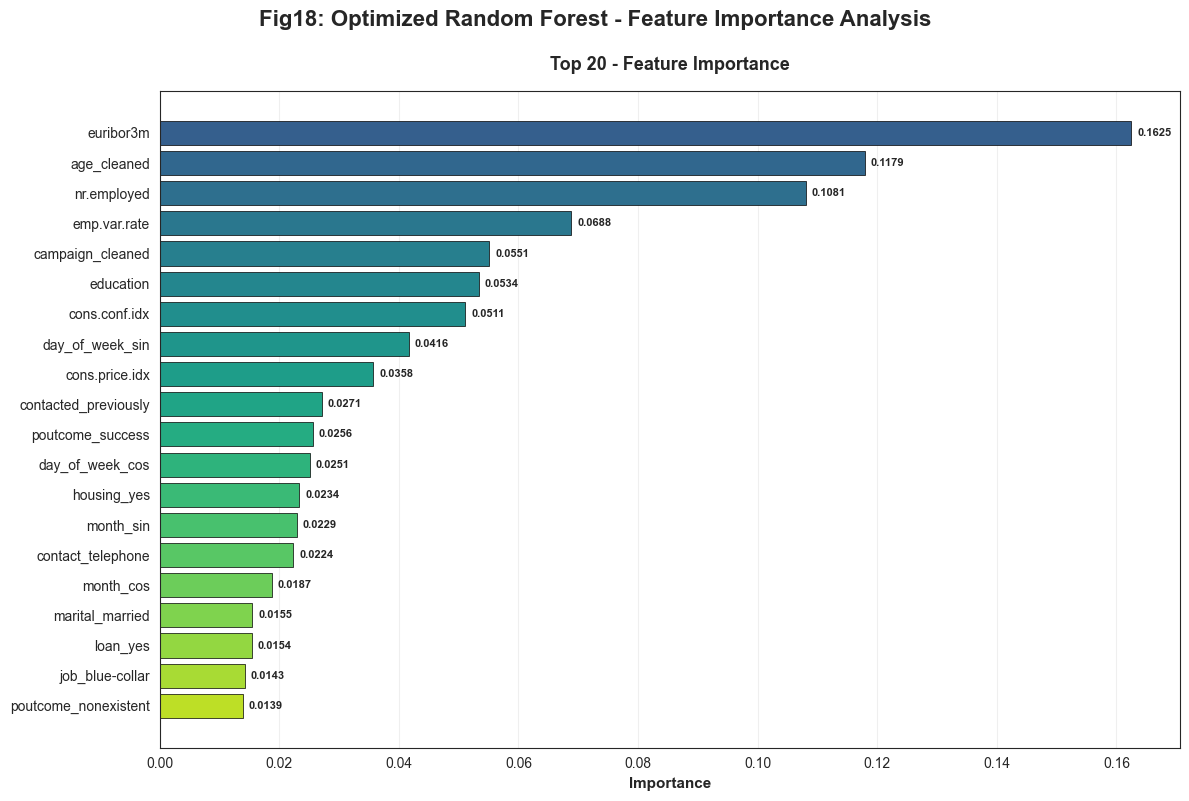


KEY INSIGHTS
✓ Most important feature: euribor3m
   Importance: 0.1625

✓ Least important (in top 20): poutcome_nonexistent
   Importance: 0.0139


In [64]:
print("="*80)
print("TOP 20 FEATURE IMPORTANCE")
print("="*80)

# Create feature importance dataframe
feature_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

# Display as table
print("\nTop 20 Features:")
print(feature_imp.to_string(index=False))

# Calculate cumulative importance
cumulative_importance = feature_imp['importance'].sum()
print(f"\nCumulative importance of top 20: {cumulative_importance:.4f} ({cumulative_importance*100:.1f}%)")

# Create visualization
plt.figure(figsize=(12, 8))

# Color gradient
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_imp)))

# Create horizontal bar chart
bars = plt.barh(range(len(feature_imp)), 
                feature_imp['importance'], 
                color=colors_gradient,
                edgecolor='black',
                linewidth=0.5)

# Customize plot
plt.yticks(range(len(feature_imp)), feature_imp['feature'], fontsize=10)
plt.xlabel('Importance', fontsize=11, fontweight='bold')
plt.title('Top 20 - Feature Importance', 
          fontsize=13, fontweight='bold', pad=15)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Add values on bars
for i, (bar, val) in enumerate(zip(bars, feature_imp['importance'])):
    plt.text(val + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{val:.4f}', 
             va='center', fontsize=8, fontweight='bold')

# Add super title
plt.suptitle('Fig18: Optimized Random Forest - Feature Importance Analysis', 
             fontsize=16, fontweight='bold', y=0.995)

# Tight layout and save
plt.tight_layout()
plt.savefig('feature_importance_top20.png', dpi=300, bbox_inches='tight')
print("\n✓ Feature importance chart saved: feature_importance_top20.png")
plt.show()

# Feature insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)
print(f"✓ Most important feature: {feature_imp.iloc[0]['feature']}")
print(f"   Importance: {feature_imp.iloc[0]['importance']:.4f}")
print(f"\n✓ Least important (in top 20): {feature_imp.iloc[19]['feature']}")
print(f"   Importance: {feature_imp.iloc[19]['importance']:.4f}")